In [ ]:
import pandas as pd
import numpy as np
import random
import operator
from functools import reduce
import random
import matplotlib.pyplot as plt

# Create the envrionment

In [ ]:
def draw(): 
    """
    randomly draw five cards from a deck of cards without replacement
    
    return: a list of five cards that are distinct from each other
    """
    result = []
    while len(result) < 5: 
      card_num = random.randint(1, 13)
      card_type = random.randint(1, 4)
      tpl = (card_num, card_type)
      if tpl not in result:
        result.append(tpl)
    return result

In [ ]:
def step(action, state, card): 
    """
    calculate the next step in the environment
    param: 
        action: fold, bet times 1/2/3
        state: the current state the model is in
        card: list of total 5 cards draw from the initial state of the game
    Return: 
        -1 if player folds, into the terminal state
        if not, add one more community card into the state, and sum up all the previous bets
    """
    ## state is consititued of [[card_list], cumulative_bet]
    ante = 100
    cards, bet = state
    if action == 0: 
        reward = -1 * (ante * bet)
        return (-1, reward)
    else: 
        #print('card3 ', len(card))
        next_card = card[len(cards)]
        cards.append(next_card)
        next_bet = bet + action
        state = (cards, next_bet)
        if len(cards) == 5: 
            reward = paytable(cards, next_bet, ante)
            return (-1, reward)
        else: 
            return (state, 0)

In [ ]:
def paytable(card_list, bet, ante): 
    df = pd.DataFrame(columns=['Card_num', 'Card_type'])
    df['Card_num'] = [x[0] for x in card_list]
    df['Card_type'] = [x[1] for x in card_list]
    df = df.sort_values(by=['Card_num'])

    typ = 0
    reward = 0
    
    
    if (list(df["Card_num"]) == [1, 10, 11, 12, 13]) and (len(df["Card_type"].unique()) == 1): 
        typ = 'royal flush'
        reward = bet * 500 * ante
    elif (len(df['Card_num'].diff()[1:].unique())== 1) and (df['Card_num'].diff()[1:].unique() == 1) and (len(df["Card_type"].unique()) == 1): 
        typ = 'Straight Flush'
        reward = bet * 100 * ante
    elif (list(df['Card_num'].value_counts())[0] == 4): 
        typ = 'Four of a Kind'
        reward = bet * 40 * ante
    elif (list(df['Card_num'].value_counts()) == [3, 2]): 
        typ = 'Full House'
        reward = bet * 10 * ante
    elif (len(df["Card_type"].unique()) == 1): 
        typ = 'Flush'
        reward = bet * 6 *ante
    elif (len(df['Card_num'].diff()[1:].unique())== 1): 
        typ = 'Straight'
        reward = bet * 4 * ante
    elif (list(df['Card_num'].value_counts())[0] == 3): 
        typ = 'Three of a Kind'
        reward = bet * 3 * ante
    elif (list(df['Card_num'].value_counts()) == [2,2,1]):
        typ = 'Two Pair'
        reward = bet * 2 * ante
    elif (list(df['Card_num'].value_counts())[0] == 2) and (df['Card_num'].value_counts().idxmax() in [11, 12, 13, 1]): 
        typ = 'Pair of Jack or Better'
        reward = bet * 1 * ante
    elif (list(df['Card_num'].value_counts())[0] == 2) and (df['Card_num'].value_counts().idxmax() in [6, 7, 8, 9, 10]):
        typ = 'Pair of 6s thru 10s'
        reward = 0
    else: 
        typ = 'All Other'
        reward = -1 * bet * ante
    return reward

In [ ]:
test_input = [[([(11, 4), (12, 3),(6, 2), (10, 1)],0),1, [(0,0), (0,0), (0,0), (0,0), (7, 2)]],[([(11, 4), (12, 4),(13, 4), (1, 4)],0),2, [(0,0), (0,0), (0,0), (0,0),(10, 4)]],[([(11, 2), (8, 3),(6, 2)],0),2, [(0,0), (0,0), (0,0),(10, 3), (7, 2)]],[([(11, 4), (10, 4),(9, 4), (8, 4)],0),3, [ (0,0), (0,0), (0,0), (0,0),(7, 4)]],[([(3, 4), (3, 3),(3, 2), (10, 1)],0),2, [(0,0), (0,0), (0,0), (0,0), (3, 2)]],[([(1, 4), (3, 3),(6, 2), (10, 1)],0),1, [(0,0), (0,0), (0,0), (0,0), (1, 2)]]]
test_result = []
for test in test_input: 
    state = test[0]
    action = test[1]
    comm = test[2]
    result = step(action, state, comm)
    test_result.append(result)
    
excepted_result = [(-1, -100),
 (-1, 100000),
 (0, ([(11, 2), (8, 3), (6, 2), (10, 3)], 2)),
 (-1, 30000),
 (-1, 8000),
 (-1, 100)]

df = pd.DataFrame(columns=['test_input', 'test_result', 'excepted_result'])
df['test_input'] = test_input
df['test_result'] = test_result
df['excepted_result'] = excepted_result
df

,test_input,test_result,excepted_result
0,"[([(11, 4), (12, 3), (6, 2), (10, 1), (7, 2)],...","(-1, -100)","(-1, -100)"
1,"[([(11, 4), (12, 4), (13, 4), (1, 4), (10, 4)]...","(-1, 100000)","(-1, 100000)"
2,"[([(11, 2), (8, 3), (6, 2), (10, 3)], 0), 2, [...","(([(11, 2), (8, 3), (6, 2), (10, 3)], 2), 0)","(0, ([(11, 2), (8, 3), (6, 2), (10, 3)], 2))"
3,"[([(11, 4), (10, 4), (9, 4), (8, 4), (7, 4)], ...","(-1, 30000)","(-1, 30000)"
4,"[([(3, 4), (3, 3), (3, 2), (10, 1), (3, 2)], 0...","(-1, 8000)","(-1, 8000)"
5,"[([(1, 4), (3, 3), (6, 2), (10, 1), (1, 2)], 0...","(-1, 100)","(-1, 100)"


# Implement Q learing

In [ ]:
def get_index(state): 
  card_state = lambda x,y: x + (y-1) * 13
  card_list, bet = state
  index = [0] * 5
  for i,card in enumerate(card_list): 
    idx = card_state(card[0], card[1])
    index[i] = idx
  index.append(bet)
  return index

In [ ]:
def epsilon_greedy(epsilon, Q, state): 
  prob = random.uniform(0,1)
  action = -1
  if prob < epsilon: 
    action = random.randint(0, 3)
  else: 
    [d1,d2,d3,d4,d5,bet] = get_index(state)
    action = np.argmax(Q[d1,d2,d3,d4,bet])
  return action

In [ ]:
def run_episode_q(alpha, gamma, epsilon, iteration, max_steps):
    # 13*4 + empty: 0 always stands for empty
    q_values = np.ones([13*4+1, 13*4+1, 13*4+1, 13*4+1, 3*3,4], dtype = np.float32)
    reward_list = []
    total_reward = 0
    
    for i in range(iteration): 
      ## return a list of total 5 cards for one episode
      card_list = draw()
      ## choose the first 2 card as first entry for state
      ## choose bet = 1, since the initial ante must exist
      state = [card_list[:2], 1]
      steps = max_steps
      #print(len(card_list) == 4)
      #print('card1, ', len(card_list))
      ep_reward = 0

      for j in range(max_steps): 
        action = epsilon_greedy(epsilon, q_values, state)
        #print('card2 ',j, ' ', len(card_list))
        state_next, r = step(action, state, card_list)
        #print('card4', len(card_list))
        ## get index only returns the index of the state
        [d1, d2, d3, d4, d5, bet] = get_index(state)
        ep_reward += r

        if state_next != -1: 
          e1, e2, e3, e4, e5, bet = get_index(state_next)
          maxq = np.max(q_values[e1,e2,e3,e4,bet])
          q_values[d1,d2,d3,d4,bet,action] += alpha*(r + gamma*maxq - q_values[d1,d2,d3,d4,bet,action])
          #state = state_next
        else: 
          q_values[d1,d2,d3,d4,bet,action] += alpha*(r + gamma*0 - q_values[d1,d2,d3,d4,bet,action])
          break
      total_reward += ep_reward
      reward_list.append(total_reward/(i+1)) 

    return q_values, reward_list

Parameter Tuning for Q learing

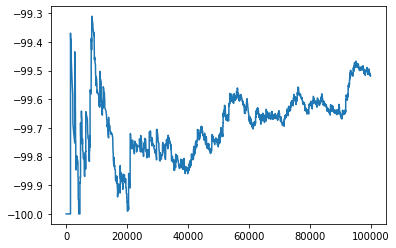

In [ ]:
## try alpha
q_values, q_reward = run_episode_q(0.03,0.1,0.1,100000,10)
plt.plot(q_reward)

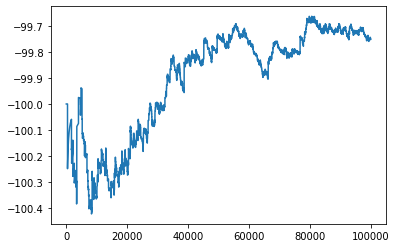

In [ ]:

q_values, q_reward = run_episode_q(0.01,0.1,0.1,100000,10)
plt.plot(q_reward)

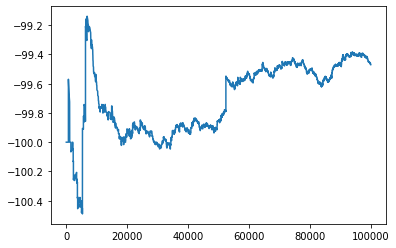

In [ ]:
q_values, q_reward = run_episode_q(0.005,0.1,0.1,100000,10)
plt.plot(q_reward)

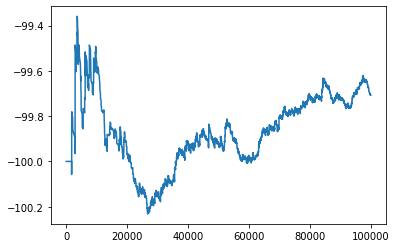

In [ ]:
q_values, q_reward = run_episode_q(0.001,0.1,0.1,100000,10)
plt.plot(q_reward)

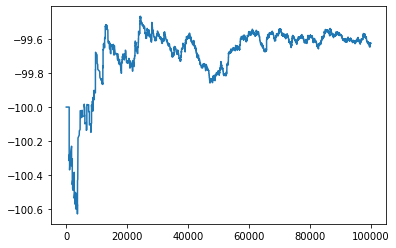

In [ ]:
## try gamma
q_values, q_reward = run_episode_q(0.01,0.3,0.1,100000,10)
plt.plot(q_reward)

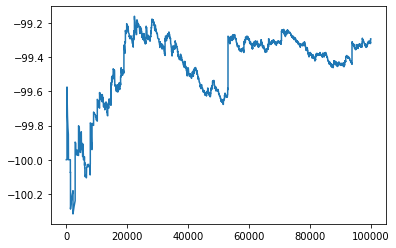

In [ ]:
q_values, q_reward = run_episode_q(0.01,0.05,0.1,100000,10)
plt.plot(q_reward)

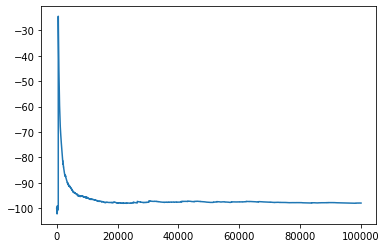

In [ ]:
## try epsilon
q_values, q_reward = run_episode_q(0.01,0.05,0.3,100000,10)
plt.plot(q_reward)

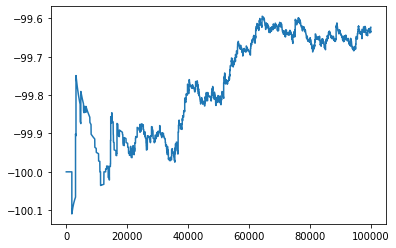

In [ ]:
q_values, q_reward = run_episode_q(0.01,0.05,0.05,100000,10)
plt.plot(q_reward)

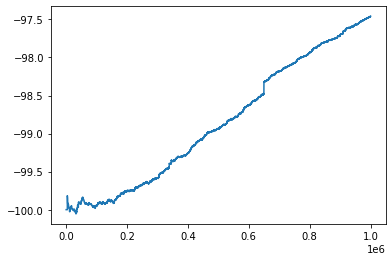

In [ ]:
q_values, q_reward = run_episode_q(0.01,0.05,0.01,1000000,10)
plt.plot(q_reward)

# Implement Monte Carlo Method

In [63]:
def mc(iteration, gamma): 
  pi = np.zeros([13*4+1, 13*4+1, 13*4+1, 13*4+1, 3*3], dtype = np.float32)
  Q = np.zeros([13*4+1, 13*4+1, 13*4+1, 13*4+1, 3*3,4], dtype = np.float32)
  returns = np.zeros([13*4+1, 13*4+1, 13*4+1, 13*4+1, 3*3,4], dtype = np.float32)
  counts = np.zeros([13*4+1, 13*4+1, 13*4+1, 13*4+1, 3*3,4], dtype = np.float32)
  rewards = []
  total_reward = 0

  for i in range(iteration): 
    card_list = draw()
    state = [card_list[:2], 1]
    action = random.randint(0,3)
    state_action_list = []
    reward_list = []
    
    while state != -1: 
      next_state, r = step(action, state, card_list)
      state_action_list.append((state, action))
      reward_list.append(r)
      action = random.randint(0,3)
      state = next_state

    G = 0
    for j in range(len(state_action_list)-1, -1, -1): 
      G  = gamma * G + reward_list[j]
      state = state_action_list[j][0]
      action = state_action_list[j][1]
      if (state,action) not in state_action_list[:j]: 
        d1,d2,d3,d4,d5,bet = get_index(state)
        returns[d1,d2,d3,d4,bet,action] += G
        counts[d1,d2,d3,d4,bet,action] += 1
        Q[d1,d2,d3,d4,bet,action] = returns[d1,d2,d3,d4,bet,action] / counts[d1,d2,d3,d4,bet,action]
        pi[d1,d2,d3,d4,bet] = np.argmax(Q[d1,d2,d3,d4,bet])
    total_reward += np.sum(reward_list)
    rewards.append(total_reward / (i+1))
  return (pi, Q, rewards)

Paramter Tuning for Monte Carlo Method

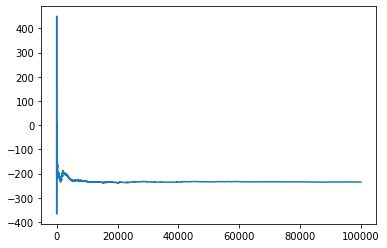

In [64]:
pi, Q, rewards = mc(100000, 0.3)
plt.plot(rewards)

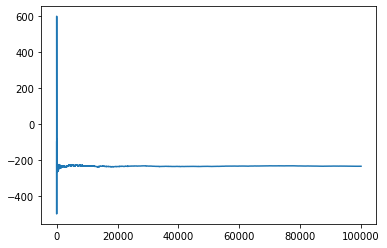

In [65]:
pi, Q, rewards = mc(100000, 0.1)
plt.plot(rewards)

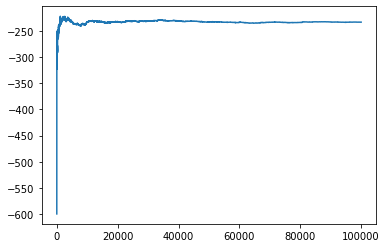

In [66]:
pi, Q, rewards = mc(100000, 0.05)
plt.plot(rewards)

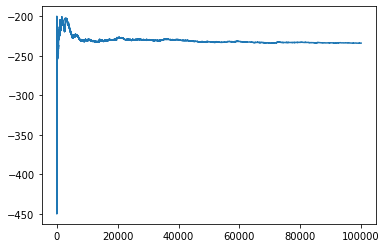

In [67]:
pi, Q, rewards = mc(100000, 0.01)
plt.plot(rewards)